In [13]:
import tensorflow.keras as keras
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [14]:
batch_size = 4
max_sequence_length = 20
vocab_size = 1000
embedding_dim = 32

In [15]:
tweet_df = pd.read_csv('tweet_sentiment.csv')
tweet_df.head()

,tweet,sentiment
0,The event starts at 5 PM.,neutral
1,I hate how this turned out.,negative
2,Fantastic experience!,positive
3,Fantastic experience!,positive
4,This is the worst thing ever!,negative


In [16]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = '<UNK>')
tokenizer.fit_on_texts(tweet_df['tweet'])
X = tokenizer.texts_to_sequences(tweet_df['tweet'])
X = pad_sequences(X, maxlen = max_sequence_length)
y_raw = tweet_df['sentiment']


In [17]:
classes = [
    'negative',
    'neutral',
    'positive',
]
num_classes = len(classes)
y = y_raw.apply(lambda x: classes.index(x))
y = y.to_numpy().astype(int)
X.shape, y.shape


((1000, 20), (1000,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape

((800, 20), (800,))

In [19]:
inputs = keras.Input(shape = (max_sequence_length,))
x = layers.Embedding(vocab_size, embedding_dim)(inputs)
x = layers.Conv1D(filters = 32, kernel_size = 5, activation = 'relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(16, activation = 'relu')(x)
outputs = layers.Dense(num_classes)(x)

In [20]:
model = keras.Model(inputs = inputs, outputs = outputs)
opt = keras.optimizers.AdamW(learning_rate = 0.00005)
model.compile(
    optimizer = opt, 
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
    metrics = ['accuracy'])

In [21]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 20, 32)         │        32,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 16, 32)         │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,731 (147.39 KB)

 Trainable params: 37,731 (147.39 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(X_train, y_train, batch_size = batch_size, epochs = 8)

Epoch 1/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.4596 - loss: 1.0788
Epoch 2/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.5015 - loss: 1.0465
Epoch 3/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.7009 - loss: 1.0155
Epoch 4/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.7091 - loss: 0.9733
Epoch 5/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.7119 - loss: 0.9126
Epoch 6/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.7260 - loss: 0.8336
Epoch 7/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.7245 - loss: 0.7552
Epoch 8/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.7121 - loss: 0.6777


In [23]:
loss, acc = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {acc:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7396 - loss: 0.6037 
Test loss: 0.6091, Test accuracy: 0.7250


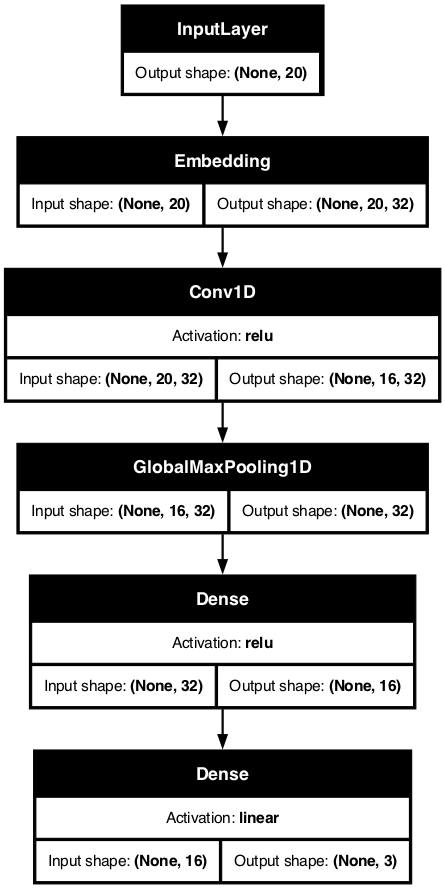

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'model.png', show_shapes = True, show_layer_activations = True, dpi = 80)
from IPython.display import Image
Image("model.png")